**Import bibliotek + import bazy danych**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**Import danych z pliku csv i podział danych na grupę: cechy oraz target**

In [2]:
diabetes = pd.read_csv('diabetes.csv')

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]

**Podział danych na zbiór treningowy oraz zbiór testowy + standaryzacja zbiorów**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train) 
X_test_standardized = scaler_2var.transform(X_test)

# Przypomnienie dlaczego fit_transform dla X_train, a dla X_test samo transform:
# "Uczymy" jak transormować na bazie zbioru treningowego i na podstawie już wytrenowanego scalera w ten sam sposób skalujemy X_test.

**Zdefiniowanie funkcji: plot_classification_surface:**

In [4]:
def generate_model_LR(penalty,C):
    if penalty == "l1":
        model = LogisticRegression(penalty=penalty,C=C,solver='liblinear')
    elif penalty == "l2":
        model = LogisticRegression(penalty=penalty,C=C)
    elif penalty == "elasticnet":
        model = LogisticRegression(penalty=penalty,C=C,solver='saga', l1_ratio=0.1)
    else:
        raise ValueError("Nieprawidłowa wartość 'penalty'")
    
    return model

**Zdefiniowanie funkcji: plot_classification_surface:**

In [5]:
def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    xx, yy = meshgrid(x1grid, x2grid)

    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    grid = hstack((r1,r2))

    yhat = trained_model.predict(grid)

    zz = yhat.reshape(xx.shape)

    plt.contourf(xx, yy, zz, cmap='Paired')

    for class_value in range(2):

        row_ix = where(y_plot == class_value)
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    plt.legend(loc='upper right')
    plt.show()

**Zdefiniowanie funkcji calculate_metrics_new:**

In [6]:
metrics_dataframe = pd.DataFrame(columns=[
    'Model', 'Penalty', 'Par_C','F1_train',
    'F1_test', 'AUC_test', 'Accuracy_test', 'Precision_test', 'Recall_test'
])

def calculate_metrics_new(model, name, X_test, y_test, X_train, y_train):
    global metrics_dataframe
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    predictions_proba = model.predict_proba(X_test)[:, 1]

    try:
        name_title = f"{name}"
        penalty = model.get_params()['penalty']
        C_value = model.get_params()['C']
    except:
        penalty = "UNKNOWN"
        C_value = "UNKNOWN"    
    
    print(f"\n Model: {name_title} - penalty:{penalty}, parametr C:{C_value}")
   
    plot_classification_surface(X_train, y_train, model)
    
    f1_metric_train = round(f1_score(y_train, predictions_train),4)
    f1_metric_test = round(f1_score(y_test, predictions_test),4)
    auc_metric = round(roc_auc_score(y_test, predictions_proba),4)
    acc_metric = round(accuracy_score(y_test, predictions_test),4)
    prec_metric = round(precision_score(y_test, predictions_test),4)
    rec_metric = round(recall_score(y_test, predictions_test),4)

    new_row = pd.DataFrame([{
        'Model': name,
        'Penalty': penalty,
        'Par_C': C_value,
        'F1_train': f1_metric_train,
        'F1_test': f1_metric_test,
        'AUC_test': auc_metric,
        'Accuracy_test': acc_metric,
        'Precision_test': prec_metric,
        'Recall_test': rec_metric
    }])

    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)
    return metrics_dataframe

**Zdefiniowanie zbiorów parametrów: "penalties" i "parametrs_C"**

In [7]:
penalties = ['l1', 'l2', 'elasticnet']
parametrs_C = [0.01, 0.1, 1, 10, 100]

**Uruchomienie pętli generującej, trenującej modele oraz wyświetlającej zbiór metryk wygenerownych modeli**


 Model: Logistic Regression - penalty:l1, parametr C:0.01


C:\Users\marci\AppData\Local\Temp\ipykernel_26632\2011725696.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


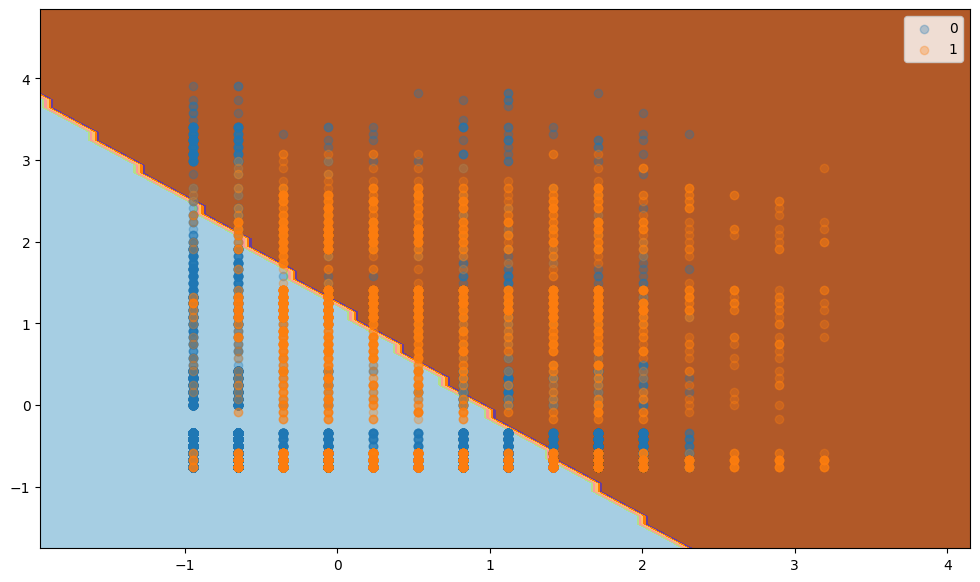

C:\Users\marci\AppData\Local\Temp\ipykernel_26632\137192969.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)



 Model: Logistic Regression - penalty:l1, parametr C:0.1


C:\Users\marci\AppData\Local\Temp\ipykernel_26632\2011725696.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


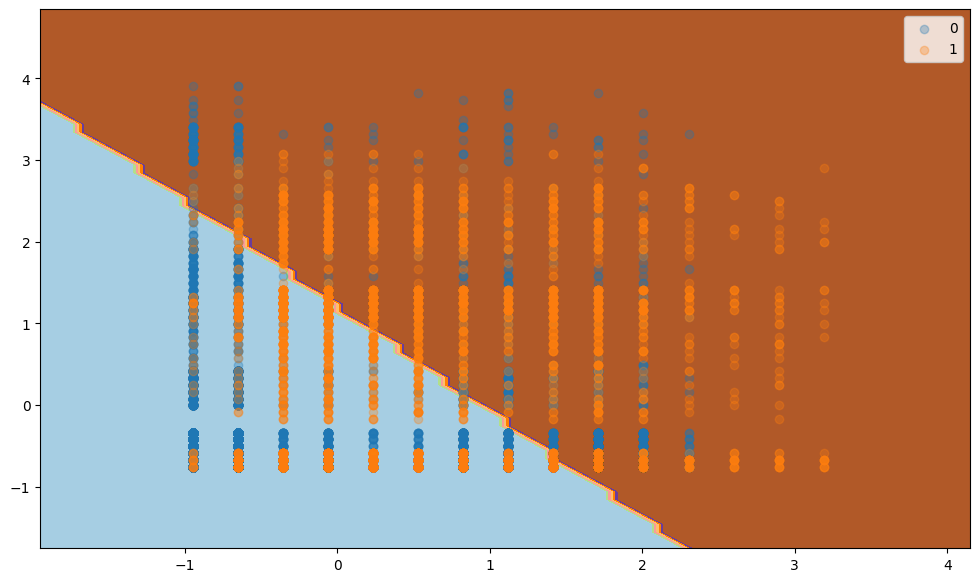

C:\Users\marci\AppData\Local\Temp\ipykernel_26632\2011725696.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)



 Model: Logistic Regression - penalty:l1, parametr C:1


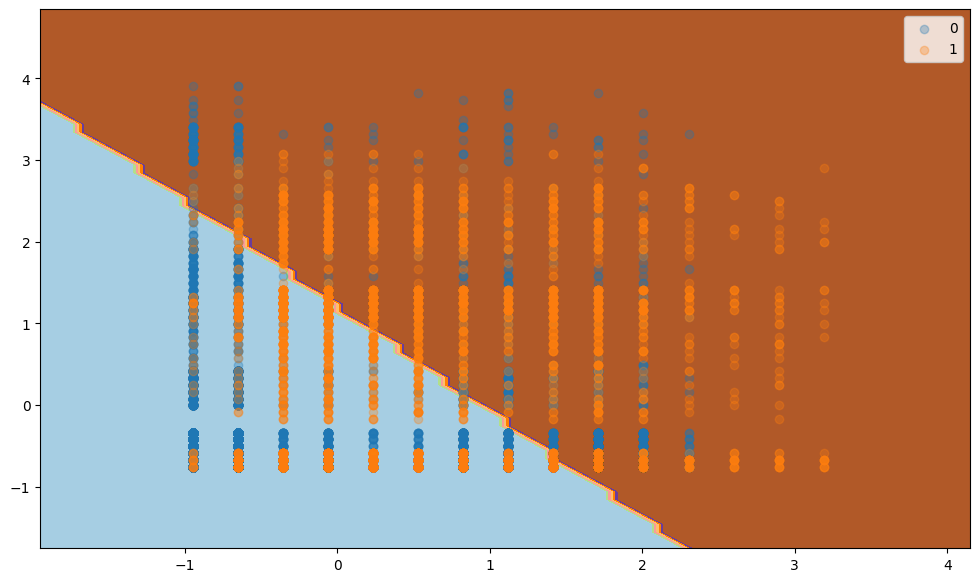


 Model: Logistic Regression - penalty:l1, parametr C:10


C:\Users\marci\AppData\Local\Temp\ipykernel_26632\2011725696.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


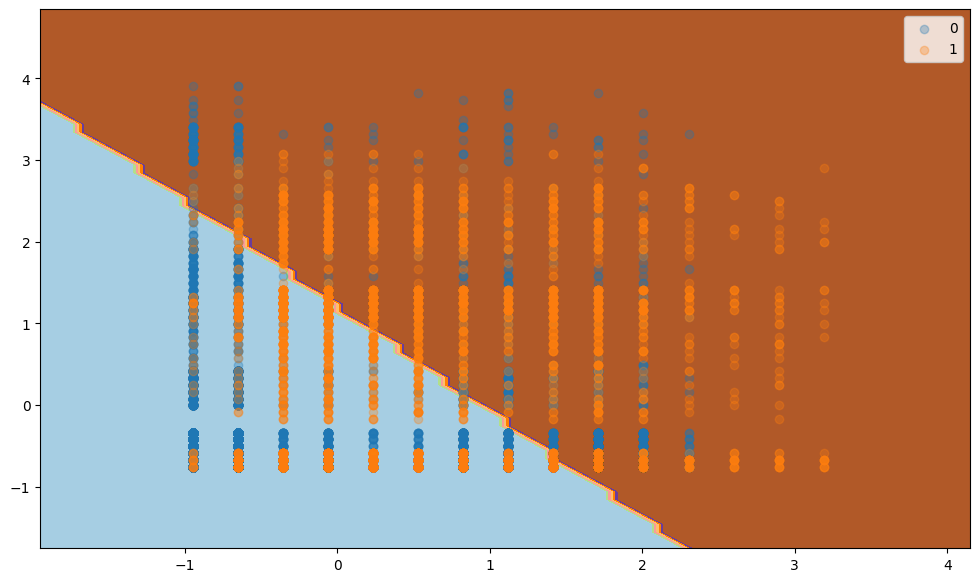


 Model: Logistic Regression - penalty:l1, parametr C:100


C:\Users\marci\AppData\Local\Temp\ipykernel_26632\2011725696.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


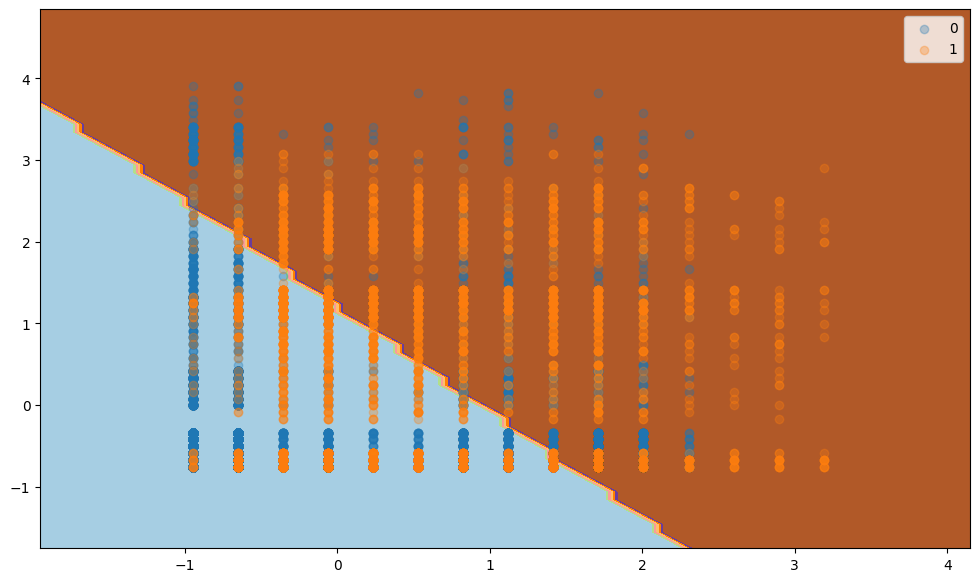


 Model: Logistic Regression - penalty:l2, parametr C:0.01


C:\Users\marci\AppData\Local\Temp\ipykernel_26632\2011725696.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


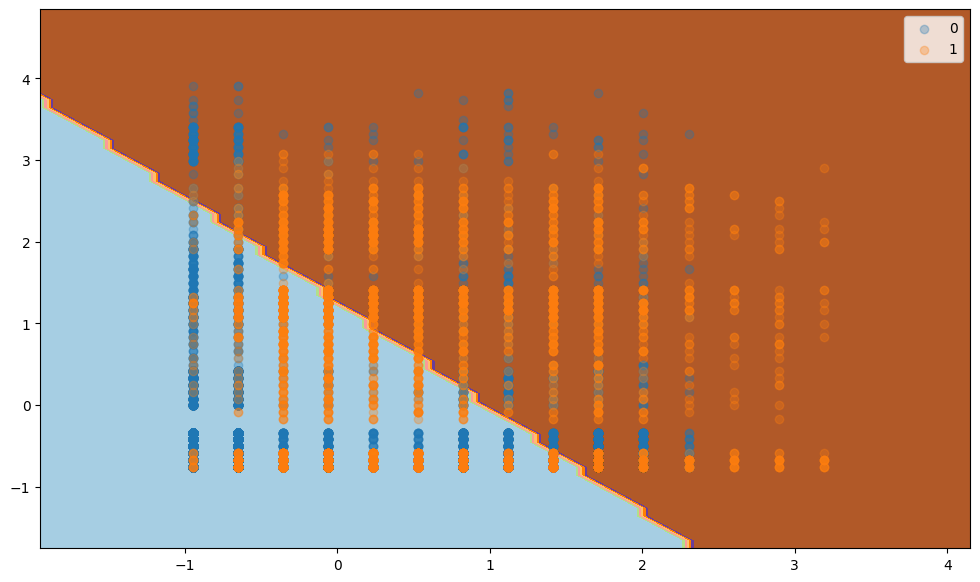


 Model: Logistic Regression - penalty:l2, parametr C:0.1


C:\Users\marci\AppData\Local\Temp\ipykernel_26632\2011725696.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


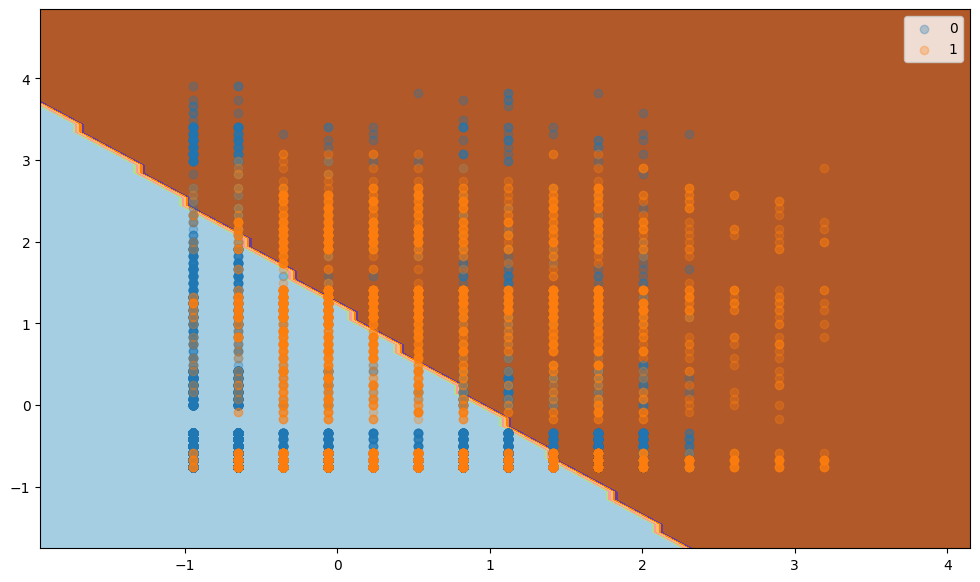


 Model: Logistic Regression - penalty:l2, parametr C:1


C:\Users\marci\AppData\Local\Temp\ipykernel_26632\2011725696.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


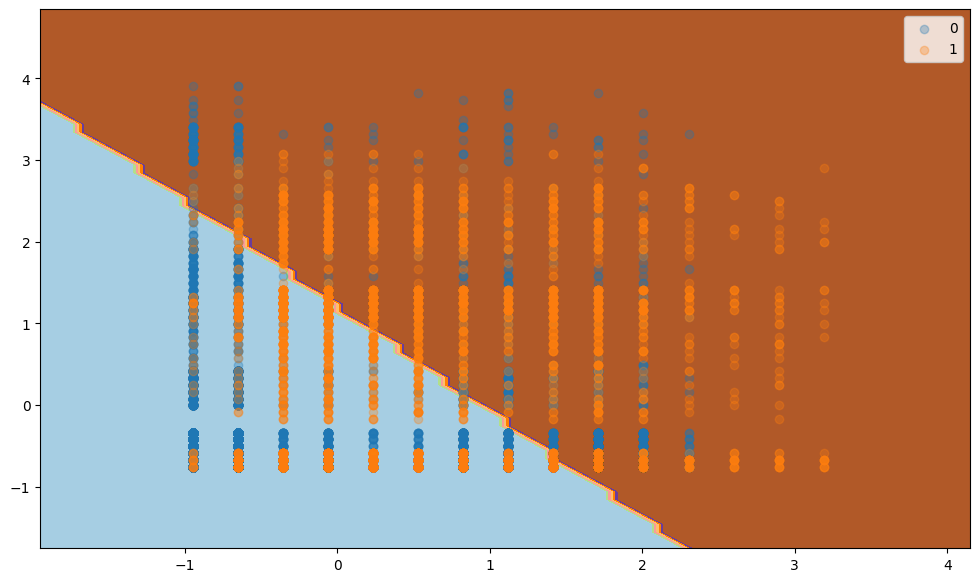


 Model: Logistic Regression - penalty:l2, parametr C:10


C:\Users\marci\AppData\Local\Temp\ipykernel_26632\2011725696.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


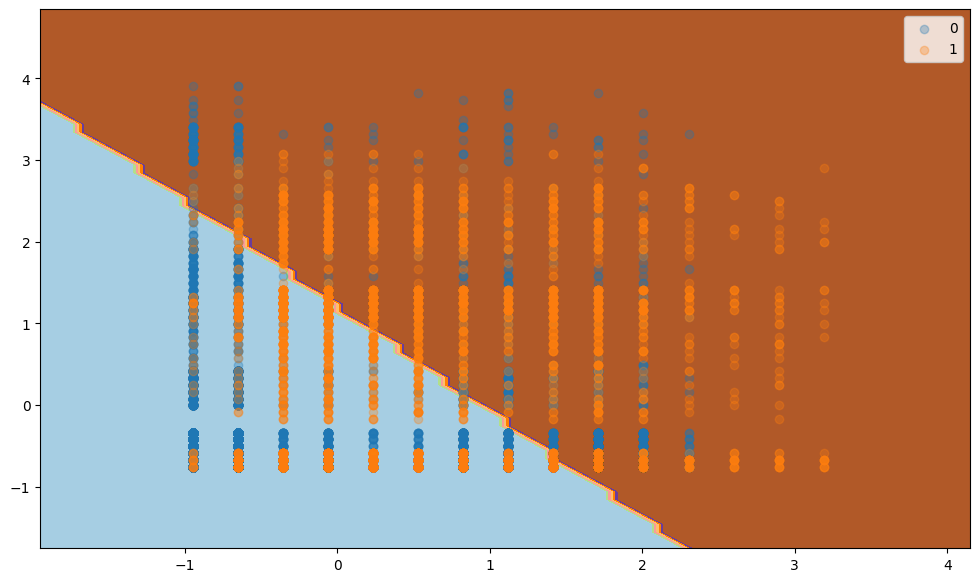


 Model: Logistic Regression - penalty:l2, parametr C:100


C:\Users\marci\AppData\Local\Temp\ipykernel_26632\2011725696.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


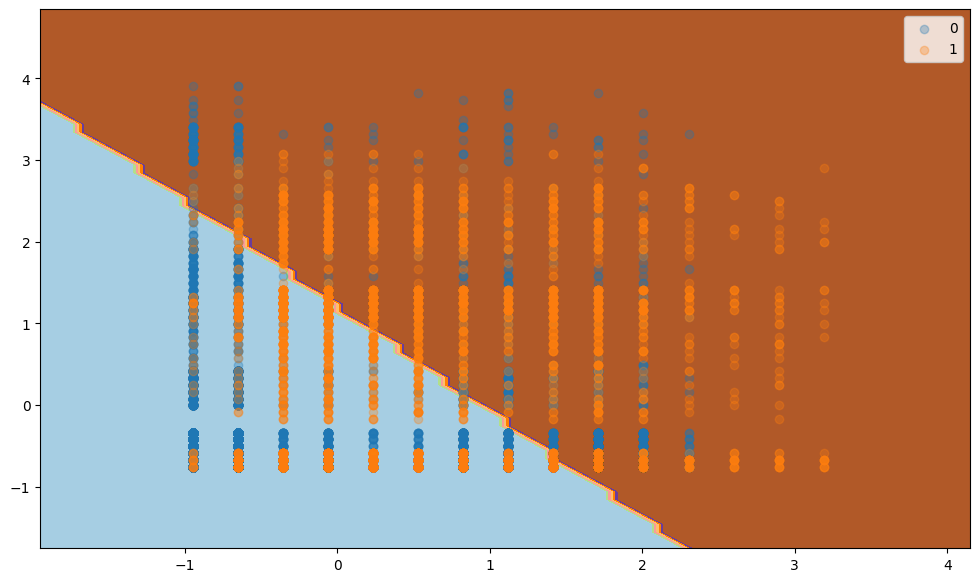


 Model: Logistic Regression - penalty:elasticnet, parametr C:0.01


C:\Users\marci\AppData\Local\Temp\ipykernel_26632\2011725696.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


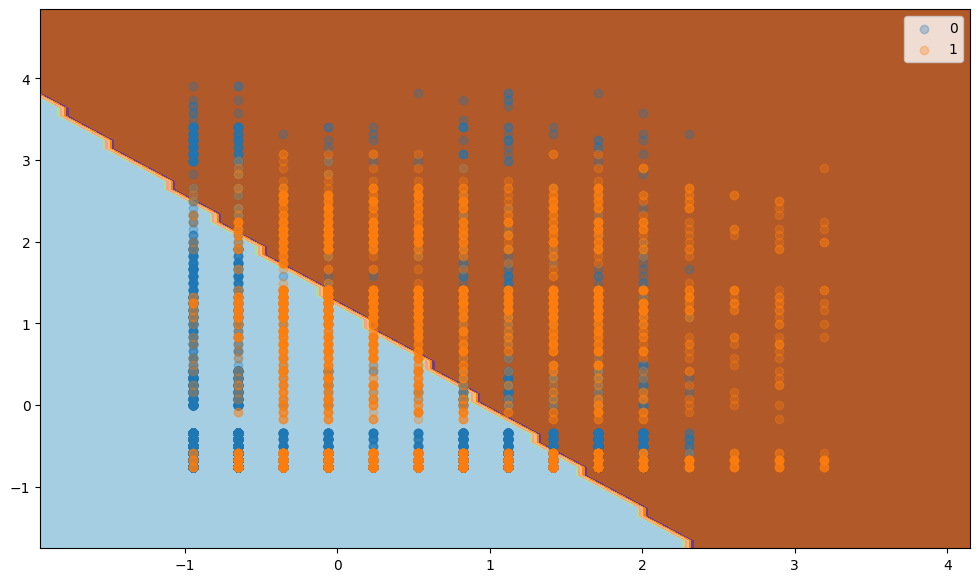


 Model: Logistic Regression - penalty:elasticnet, parametr C:0.1


C:\Users\marci\AppData\Local\Temp\ipykernel_26632\2011725696.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


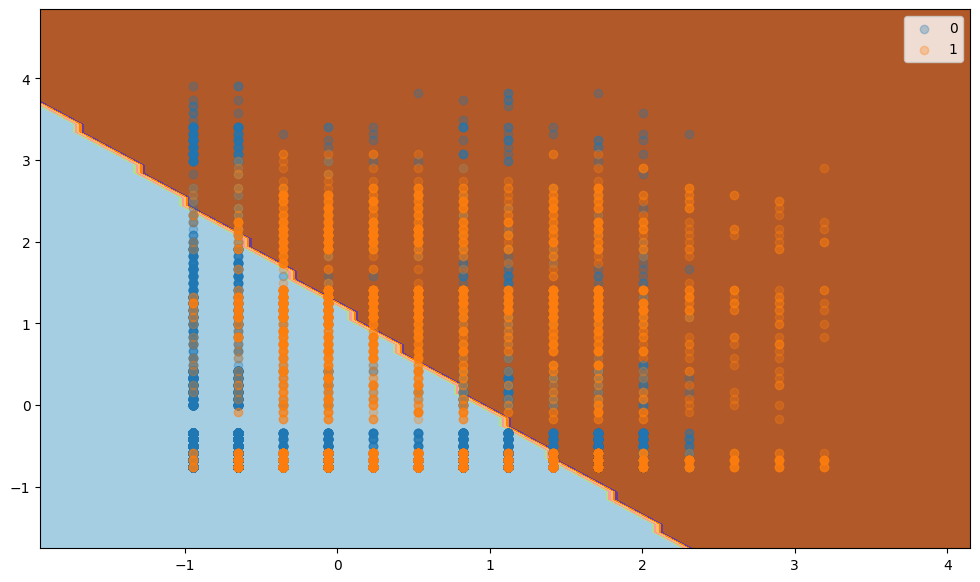


 Model: Logistic Regression - penalty:elasticnet, parametr C:1


C:\Users\marci\AppData\Local\Temp\ipykernel_26632\2011725696.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


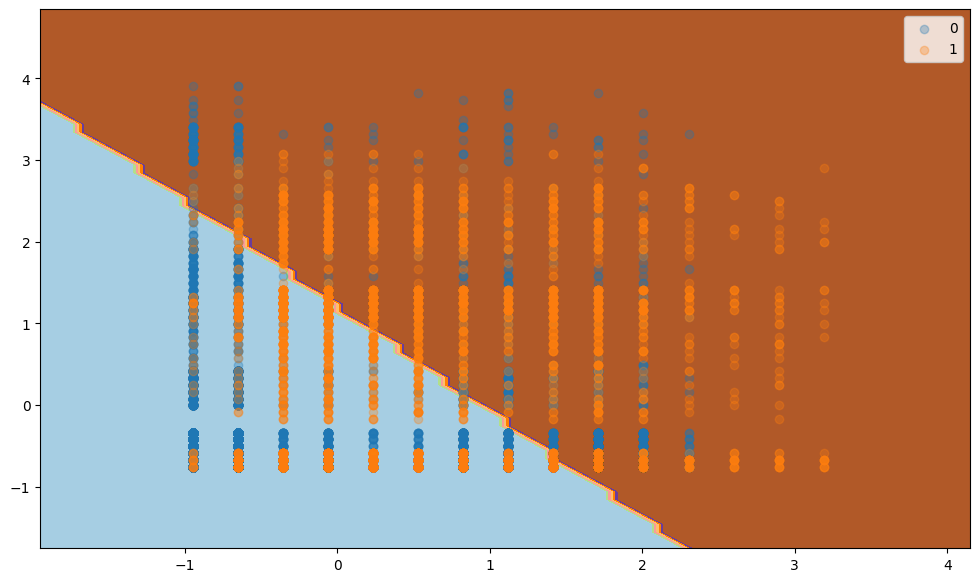

C:\Users\marci\AppData\Local\Temp\ipykernel_26632\2011725696.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)



 Model: Logistic Regression - penalty:elasticnet, parametr C:10


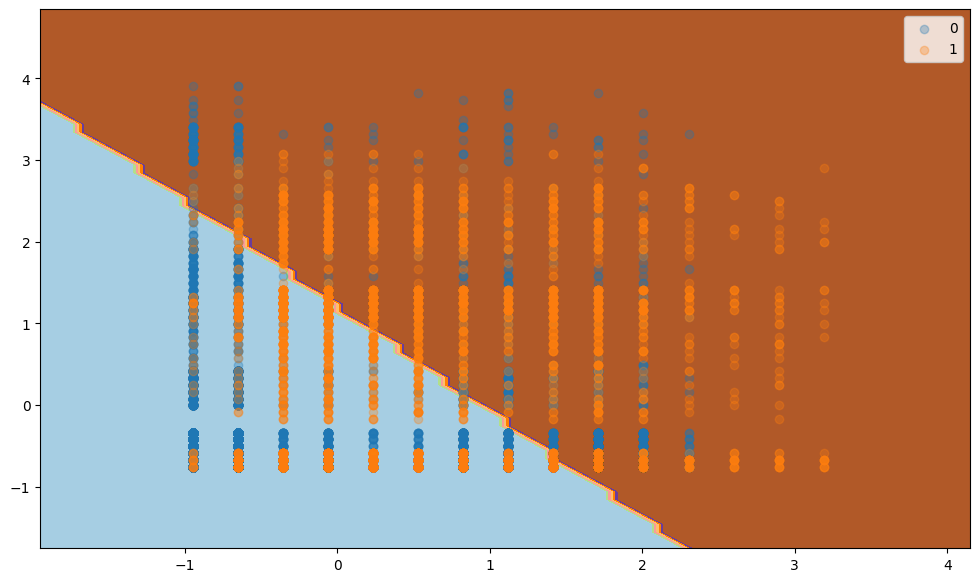


 Model: Logistic Regression - penalty:elasticnet, parametr C:100


C:\Users\marci\AppData\Local\Temp\ipykernel_26632\2011725696.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


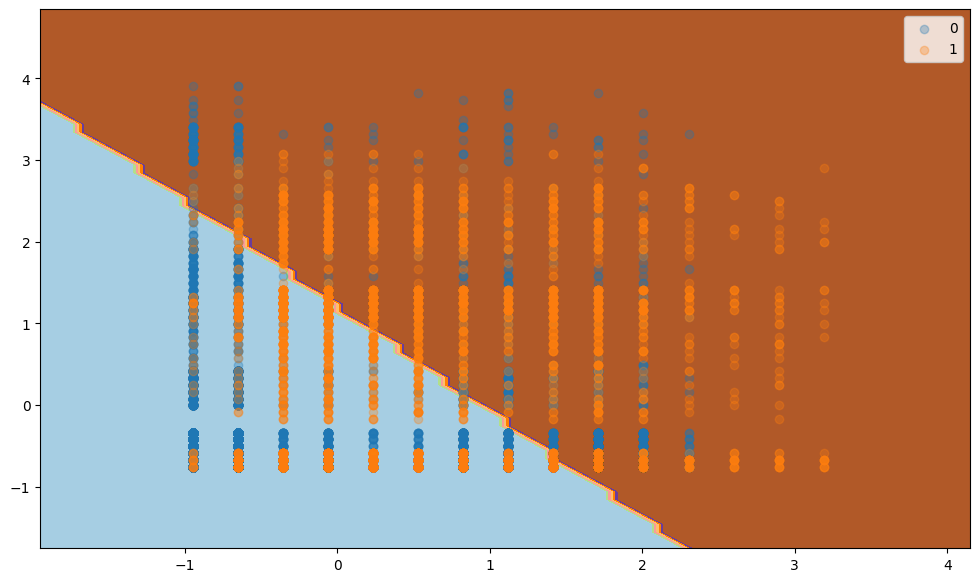

,Model,Penalty,Par_C,F1_train,F1_test,AUC_test,Accuracy_test,Precision_test,Recall_test
0,Logistic Regression,l1,0.01,0.5464,0.5773,0.8160,0.7436,0.6407,0.5253
1,Logistic Regression,l1,0.10,0.5469,0.5809,0.8165,0.7451,0.6427,0.5300
2,Logistic Regression,l1,1.00,0.5469,0.5809,0.8165,0.7451,0.6427,0.5300
3,Logistic Regression,l1,10.00,0.5469,0.5809,0.8165,0.7451,0.6427,0.5300
4,Logistic Regression,l1,100.00,0.5469,0.5809,0.8165,0.7451,0.6427,0.5300
5,Logistic Regression,l2,0.01,0.5368,0.5675,0.8165,0.7416,0.6417,0.5087
6,Logistic Regression,l2,0.10,0.5464,0.5773,0.8165,0.7436,0.6407,0.5253
7,Logistic Regression,l2,1.00,0.5469,0.5809,0.8165,0.7451,0.6427,0.5300
8,Logistic Regression,l2,10.00,0.5469,0.5809,0.8165,0.7451,0.6427,0.5300
9,Logistic Regression,l2,100.00,0.5469,0.5809,0.8165,0.7451,0.6427,0.5300


In [8]:
for penalty in penalties:
    for C in parametrs_C:
      label = f"Logistic Regression"  
      model = generate_model_LR(penalty,C)
      model.fit(X_train_standardized,y_train)
      metrics_dataframe = calculate_metrics_new(model, label, X_test_standardized, y_test, X_train_standardized, y_train)
display(metrics_dataframe)

**WNIOSKI:**

In [9]:
print("=== Podsumowanie wyników regresji logistycznej ===\n")
print(f"Rodzaje regularyzacji: {penalties}")
print(f"Zastosowane wartości parametru C: {parametrs_C}\n")

print("📊 Zakresy metryk na zbiorze testowym (dla różnych modeli):")
print(f" - Dokładność (Accuracy): {round(metrics_dataframe['Accuracy_test'].min(), 4)} – {round(metrics_dataframe['Accuracy_test'].max(), 4)}")
print(f" - Precyzja (Precision): {round(metrics_dataframe['Precision_test'].min(), 4)} – {round(metrics_dataframe['Precision_test'].max(), 4)}")
print(f" - Czułość (Recall): {round(metrics_dataframe['Recall_test'].min(), 4)} – {round(metrics_dataframe['Recall_test'].max(), 4)}")

print("\n📉 Ogólna jakość predykcji:")
print("Modele regresji logistycznej (nawet przy zmianie regularyzacji) osiągają podobne, raczej niskie wyniki.")
print("Wskazuje to, że tylko dwie cechy: 'Pregnancies' i 'Age'są prawdopodobnie niewystarczające do skutecznego przewidywania cukrzycy.")

print("\n📐 Metryka F1 (zbalansowana ocena precyzji i czułości):")
print(f" - F1 (trening): {round(metrics_dataframe['F1_train'].min(), 4)} – {round(metrics_dataframe['F1_train'].max(), 4)}")
print(f" - F1 (test):    {round(metrics_dataframe['F1_test'].min(), 4)} – {round(metrics_dataframe['F1_test'].max(), 4)}")

print("\n🧠 Wnioski:")
print("Mała różnicy między F1 na zbiorze treningowym i testowym sugeruje brak przetrenowania.")
print("Niski poziom metryk wskazuje, że model raczej wymaga dotrenowania na większek ilości cech.")

=== Podsumowanie wyników regresji logistycznej ===

Rodzaje regularyzacji: ['l1', 'l2', 'elasticnet']
Zastosowane wartości parametru C: [0.01, 0.1, 1, 10, 100]

📊 Zakresy metryk na zbiorze testowym (dla różnych modeli):
 - Dokładność (Accuracy): 0.7416 – 0.7451
 - Precyzja (Precision): 0.6407 – 0.6427
 - Czułość (Recall): 0.5087 – 0.53

📉 Ogólna jakość predykcji:
Modele regresji logistycznej (nawet przy zmianie regularyzacji) osiągają podobne, raczej niskie wyniki.
Wskazuje to, że tylko dwie cechy: 'Pregnancies' i 'Age'są prawdopodobnie niewystarczające do skutecznego przewidywania cukrzycy.

📐 Metryka F1 (zbalansowana ocena precyzji i czułości):
 - F1 (trening): 0.5368 – 0.5469
 - F1 (test):    0.5675 – 0.5809

🧠 Wnioski:
Mała różnicy między F1 na zbiorze treningowym i testowym sugeruje brak przetrenowania.
Niski poziom metryk wskazuje, że model raczej wymaga dotrenowania na większek ilości cech.
